In [1]:
%pylab inline
from __future__ import division
import os
import numpy as np
import PIL.Image as pil
import tensorflow as tf
from SfMLearner import SfMLearner
from utils import normalize_depth_for_display
import cv2

img_height=128
img_width=416
ckpt_file_1 = './checkpoint_2/model.latest'
ckpt_file_2 = './models/depth_model/model-190532'



Populating the interactive namespace from numpy and matplotlib
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
# # fh = open('misc/sample.png', 'r')
# # fh = open('./KITTI/SfMLearnerData/2011_09_26_drive_0001_sync_02/0000000018.jpg', 'r')
# fh = open('/home/skotasai/SfMLearner/KITTI/2011_09_26/2011_09_26_drive_0093_sync/image_02/data/0000000100.png', 'r')
# I = pil.open(fh)
# I = I.resize((img_width, img_height), pil.ANTIALIAS)
# I = np.array(I)


# fh_r = open('/home/skotasai/SfMLearner/KITTI/2011_09_26/2011_09_26_drive_0093_sync/image_03/data/0000000100.png', 'r')
# I_r = pil.open(fh_r)
# I_r = I_r.resize((img_width, img_height), pil.ANTIALIAS)
# I_r = np.array(I_r)

# # plt.imshow(I)



In [3]:
# sfm = SfMLearner()
# sfm.setup_inference(img_height,
#                     img_width,
#                     mode='depth')

In [4]:
# saver_1 = tf.train.Saver([var for var in tf.model_variables()]) 
# with tf.Session() as sess:
#     saver_1.restore(sess, ckpt_file_1)
#     pred_1 = sfm.inference(I[None,:,:,:], sess, mode='depth')

# saver_2 = tf.train.Saver([var for var in tf.model_variables()]) 
# with tf.Session() as sess:
#     saver_2.restore(sess, ckpt_file_2)
#     pred_2 = sfm.inference(I[None,:,:,:], sess, mode='depth')

In [5]:
imgs = ['100','030','250','400']
count=0
sfm = SfMLearner()
sfm.setup_inference(img_height,
                    img_width,
                    mode='depth')
saver_1 = tf.train.Saver([var for var in tf.model_variables()]) 
saver_2 = tf.train.Saver([var for var in tf.model_variables()]) 



Instructions for updating:
Please use `layer.__call__` method instead.




INFO:tensorflow:Restoring parameters from ./checkpoint_2/model.latest
INFO:tensorflow:Restoring parameters from ./models/depth_model/model-190532
INFO:tensorflow:Restoring parameters from ./checkpoint_2/model.latest
INFO:tensorflow:Restoring parameters from ./models/depth_model/model-190532
INFO:tensorflow:Restoring parameters from ./checkpoint_2/model.latest
INFO:tensorflow:Restoring parameters from ./models/depth_model/model-190532
INFO:tensorflow:Restoring parameters from ./checkpoint_2/model.latest
INFO:tensorflow:Restoring parameters from ./models/depth_model/model-190532


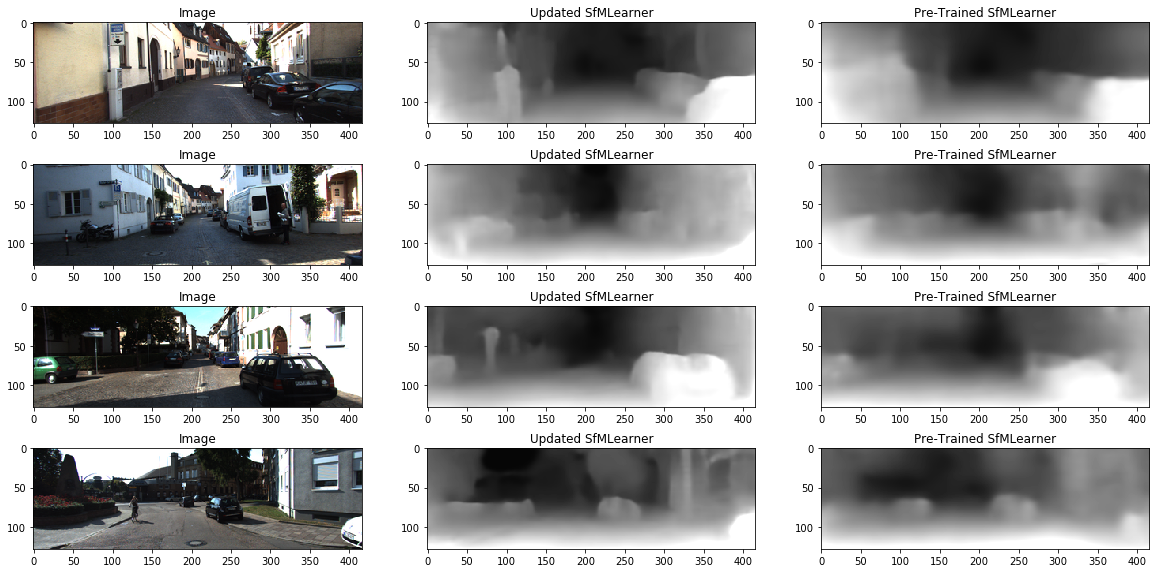

In [6]:

figure(figsize=(20,10))

for j in imgs:
    fh = open('/home/skotasai/SfMLearner/KITTI/2011_09_26/2011_09_26_drive_0093_sync/image_02/data/0000000'+j+'.png', 'r')
    I = pil.open(fh)
    I = I.resize((img_width, img_height), pil.ANTIALIAS)
    I = np.array(I)


    fh_r = open('/home/skotasai/SfMLearner/KITTI/2011_09_26/2011_09_26_drive_0093_sync/image_03/data/0000000'+j+'.png', 'r')
    I_r = pil.open(fh_r)
    I_r = I_r.resize((img_width, img_height), pil.ANTIALIAS)
    I_r = np.array(I_r)
    

    with tf.Session() as sess:
        saver_1.restore(sess, ckpt_file_1)
        pred_1 = sfm.inference(I[None,:,:,:], sess, mode='depth')

#     with tf.Session() as sess:
        saver_2.restore(sess, ckpt_file_2)
        pred_2 = sfm.inference(I[None,:,:,:], sess, mode='depth')
    
    subplot(4,3,count+1,frame_on=True); title("Image"); imshow(I)
    subplot(4,3,count+2,frame_on=True); title("Updated SfMLearner"); imshow(normalize_depth_for_display(pred_1['depth'][0,:,:,0]))
    subplot(4,3,count+3,frame_on=True); title("Pre-Trained SfMLearner"); imshow(normalize_depth_for_display(pred_2['depth'][0,:,:,0]))
    count+=3


In [12]:
plt.savefig('./results/depth.png',dpi=300,quality=100)

<Figure size 432x288 with 0 Axes>

In [8]:
# figure(figsize=(15,15))
# plt.tight_layout()
# subplot(1,3,1,frame_on=True); title("Image"); imshow(I)
# subplot(1,3,2,frame_on=True); title("Updated SfMLearner"); imshow(normalize_depth_for_display(pred_1['depth'][0,:,:,0]))
# subplot(1,3,3,frame_on=True); title("Pre-Trained SfMLearner"); imshow(normalize_depth_for_display(pred_2['depth'][0,:,:,0]))

# # subplot(4,1,2); title("Ground Truth"); imshow(disparity,cmap='gray')


In [9]:
# import cv2
# img = cv2.imread('KITTI/SfMLearnerData/2011_09_26_drive_0001_sync_02/0000000021.jpg')

# plt.imshow(img)

In [10]:
# %matplotlib notebook 
# subplot(1,2,1); title("Image"); imshow(I)
# subplot(1,2,2); title("Image 2"); imshow(I_r)



In [11]:
# sfm = SfMLearner()
# sfm.setup_inference(img_height,
#                     img_width,
#                     mode='pose')
# saver_1 = tf.train.Saver([var for var in tf.model_variables()]) 
# with tf.Session() as sess:
#     saver_1.restore(sess, ckpt_file_1)
#     pred_1 = sfm.inference(I[None,:,:,:], sess, mode='pose')

# print(pred_1)